Scratch code to try things out or investigate

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df_1_1_RF = pd.read_csv('progress/modeling/model_1_1_RF_results.csv', index_col = 0)
df_1_2_RF = pd.read_csv('progress/modeling/model_1_2_RF_results.csv', index_col = 0)
df_1_3_RF = pd.read_csv('progress/modeling/model_1_3_RF_results.csv', index_col = 0)

df_1_1_LR = pd.read_csv('progress/modeling/model_1_1_LR_results.csv', index_col = 0)
df_1_2_LR = pd.read_csv('progress/modeling/model_1_2_LR_results.csv', index_col = 0)
df_1_3_LR = pd.read_csv('progress/modeling/model_1_3_LR_results.csv', index_col = 0)

df_1_1_NB = pd.read_csv('progress/modeling/model_1_1_NB_results.csv', index_col = 0)
df_1_2_NB = pd.read_csv('progress/modeling/model_1_2_NB_results.csv', index_col = 0)
df_1_3_NB = pd.read_csv('progress/modeling/model_1_3_NB_results.csv', index_col = 0)

In [3]:
df_1_1_RF

,Model 1.1 (Serious),Model 1.1 (Death),Model 1.1 (Disabling),Model 1.1 (Hospital),Model 1.1 (Life Threatening)
names,,,,,
Train_acc,98.206384,99.331959,99.845341,99.041973,99.868969
Train_Recall_0,0.977865,0.998046,0.999934,0.997819,0.999978
Train_Recall_1,0.988204,0.944104,0.938776,0.967217,0.966311
Train_Precision_0,0.991820,0.994650,0.998483,0.989632,0.998662
Train_Precision_1,0.968280,0.978902,0.997172,0.992977,0.999419
Train_Fscore_0,0.984793,0.996345,0.999208,0.993708,0.999319
Train_Fscore_1,0.978141,0.961188,0.967093,0.979928,0.982586
Test_acc,84.732458,93.061794,97.749771,82.412455,96.175483
Test_Recall_0,0.893734,0.992471,0.999151,0.943029,0.998272


In [4]:
# Test accuracy for each model, each outcome

    Test_acc names feature_set
0  84.732458  RF_1          RF
1  85.296680  RF_2          RF
2  86.782085  RF_3          RF
3  80.053203  LR_1          LR
4  84.442799  LR_2          LR
5  86.123588  LR_3          LR
6  54.912564  NB_1          NB
7  65.892655  NB_2          NB
8  65.003707  NB_3          NB


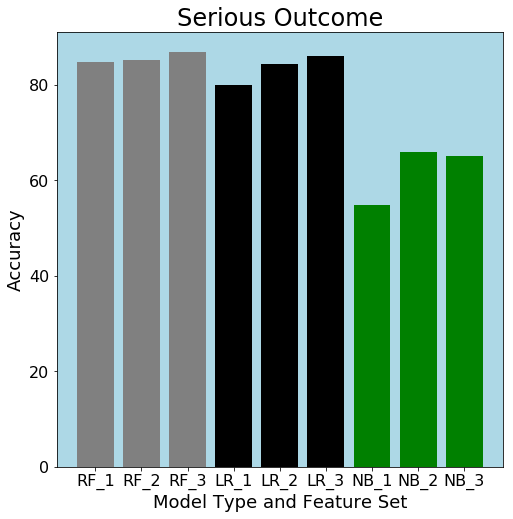

In [38]:
# Serious, test_acc
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Serious)'], 
                    df_1_2_RF['Model 1.2 (Serious)'],
                    df_1_3_RF['Model 1.3 (Serious)'],
                    df_1_1_LR['Model 1.1 (Serious)'], 
                    df_1_2_LR['Model 1.2 (Serious)'],
                    df_1_3_LR['Model 1.3 (Serious)'],
                    df_1_1_NB['Model 1.1 (Serious)'], 
                    df_1_2_NB['Model 1.2 (Serious)'],
                    df_1_3_NB['Model 1.3 (Serious)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_acc']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
df_tmp['feature_set'] = ['RF', 'RF', 'RF', 'LR', 'LR', 'LR', 'NB', 'NB', 'NB']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_acc'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('lightblue')

plt.ylabel('Accuracy', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Serious Outcome', fontsize = 24)

plt.show()

    Test_acc names
0  93.061794  RF_1
1  94.223229  RF_2
2  94.670969  RF_3
3  90.728708  LR_1
4  93.678662  LR_2
5  94.117134  LR_3
6  16.375213  NB_1
7  23.621155  NB_2
8  24.133269  NB_3


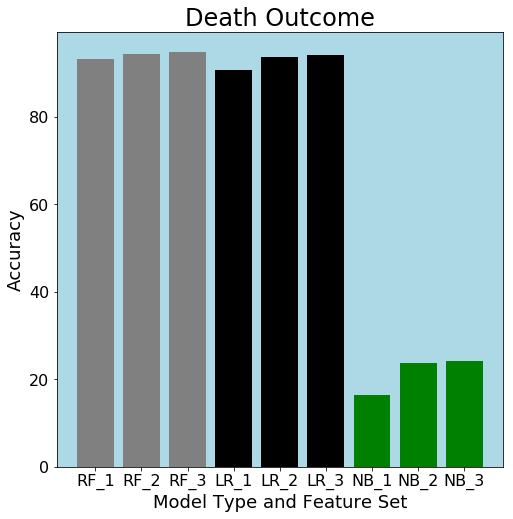

In [37]:
# Death, test_acc
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Death)'], 
                    df_1_2_RF['Model 1.2 (Death)'],
                    df_1_3_RF['Model 1.3 (Death)'],
                    df_1_1_LR['Model 1.1 (Death)'], 
                    df_1_2_LR['Model 1.2 (Death)'],
                    df_1_3_LR['Model 1.3 (Death)'],
                    df_1_1_NB['Model 1.1 (Death)'], 
                    df_1_2_NB['Model 1.2 (Death)'],
                    df_1_3_NB['Model 1.3 (Death)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_acc']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_acc'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('lightblue')

plt.ylabel('Accuracy', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Death Outcome', fontsize = 24)


plt.show()

    Test_acc names
0  97.749771  RF_1
1  97.490633  RF_2
2  97.771576  RF_3
3  97.479395  LR_1
4  97.368650  LR_2
5  97.461951  LR_3
6   8.604073  NB_1
7  11.679882  NB_2
8  18.904540  NB_3


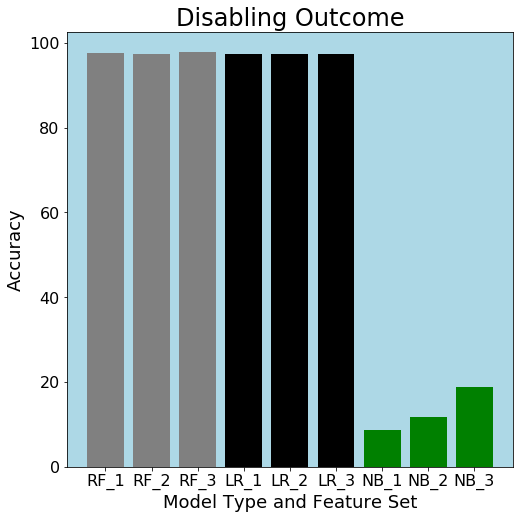

In [39]:
# Disabling, test_acc
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Disabling)'], 
                    df_1_2_RF['Model 1.2 (Disabling)'],
                    df_1_3_RF['Model 1.3 (Disabling)'],
                    df_1_1_LR['Model 1.1 (Disabling)'], 
                    df_1_2_LR['Model 1.2 (Disabling)'],
                    df_1_3_LR['Model 1.3 (Disabling)'],
                    df_1_1_NB['Model 1.1 (Disabling)'], 
                    df_1_2_NB['Model 1.2 (Disabling)'],
                    df_1_3_NB['Model 1.3 (Disabling)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_acc']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_acc'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('lightblue')
plt.ylabel('Accuracy', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Disabling Outcome', fontsize = 24)

plt.show()

    Test_acc names features
0  82.412455  RF_1        1
1  81.698179  RF_2        2
2  83.463434  RF_3        3
3  79.137412  LR_1        1
4  81.266882  LR_2        2
5  81.392002  LR_3        3
6  71.191836  NB_1        1
7  72.270628  NB_2        2
8  74.466879  NB_3        3


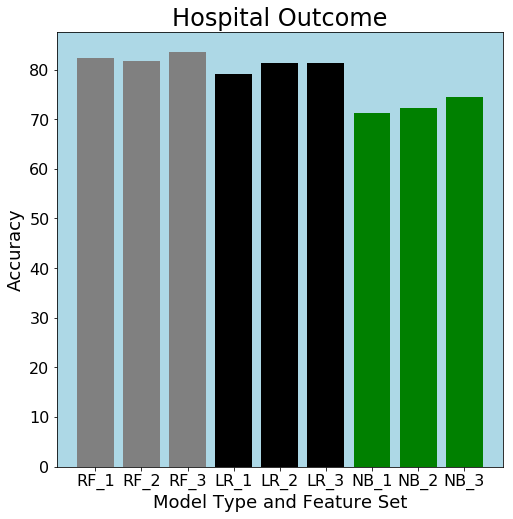

In [41]:
# Hospital, test_acc
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Hospital)'], 
                    df_1_2_RF['Model 1.2 (Hospital)'],
                    df_1_3_RF['Model 1.3 (Hospital)'],
                    df_1_1_LR['Model 1.1 (Hospital)'], 
                    df_1_2_LR['Model 1.2 (Hospital)'],
                    df_1_3_LR['Model 1.3 (Hospital)'],
                    df_1_1_NB['Model 1.1 (Hospital)'], 
                    df_1_2_NB['Model 1.2 (Hospital)'],
                    df_1_3_NB['Model 1.3 (Hospital)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_acc']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
df_tmp['features'] = ['1', '2', '3', '1', '2', '3', '1', '2', '3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_acc'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('lightblue')



plt.ylabel('Accuracy', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Hospital Outcome', fontsize = 24)

plt.show()

    Test_acc names
0  96.175483  RF_1
1  96.048619  RF_2
2  96.214731  RF_3
3  95.730670  LR_1
4  95.756731  LR_2
5  95.578038  LR_3
6   7.679560  NB_1
7  12.032761  NB_2
8  17.011905  NB_3


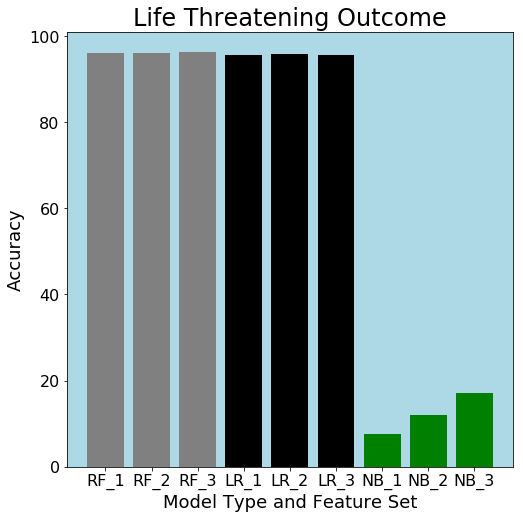

In [42]:
# Hospital, test_acc
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Life Threatening)'], 
                    df_1_2_RF['Model 1.2 (Life Threatening)'],
                    df_1_3_RF['Model 1.3 (Life Threatening)'],
                    df_1_1_LR['Model 1.1 (Life Threatening)'], 
                    df_1_2_LR['Model 1.2 (Life Threatening)'],
                    df_1_3_LR['Model 1.3 (Life Threatening)'],
                    df_1_1_NB['Model 1.1 (Life Threatening)'], 
                    df_1_2_NB['Model 1.2 (Life Threatening)'],
                    df_1_3_NB['Model 1.3 (Life Threatening)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_acc']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_acc'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('lightblue')
plt.ylabel('Accuracy', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Life Threatening Outcome', fontsize = 24)

plt.show()

In [10]:
# Test Recall for each model, each outcome

   Test_Recall_1 names
0       0.779706  RF_1
1       0.796902  RF_2
2       0.822029  RF_3
3       0.769956  LR_1
4       0.842842  LR_2
5       0.858352  LR_3
6       0.963142  NB_1
7       0.959722  NB_2
8       0.970320  NB_3


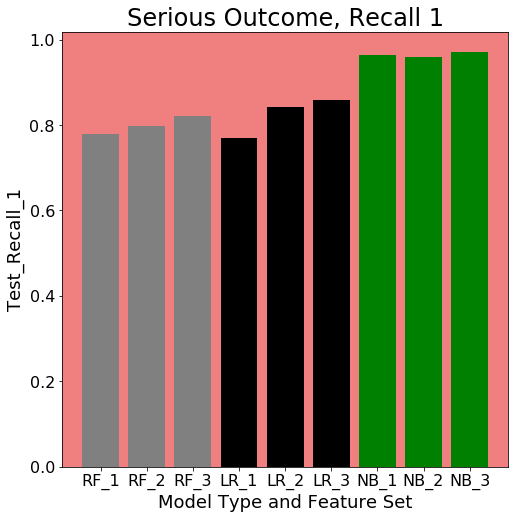

In [45]:
# Serious, Test_Recall_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Serious)'], 
                    df_1_2_RF['Model 1.2 (Serious)'],
                    df_1_3_RF['Model 1.3 (Serious)'],
                    df_1_1_LR['Model 1.1 (Serious)'], 
                    df_1_2_LR['Model 1.2 (Serious)'],
                    df_1_3_LR['Model 1.3 (Serious)'],
                    df_1_1_NB['Model 1.1 (Serious)'], 
                    df_1_2_NB['Model 1.2 (Serious)'],
                    df_1_3_NB['Model 1.3 (Serious)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Recall_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Recall_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('lightcoral')

plt.ylabel('Test_Recall_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Serious Outcome, Recall 1', fontsize = 24)

plt.show()

   Test_Recall_1 names
0       0.310245  RF_1
1       0.414375  RF_2
2       0.508418  RF_3
3       0.086099  LR_1
4       0.410999  LR_2
5       0.462722  LR_3
6       0.961520  NB_1
7       0.956585  NB_2
8       0.942761  NB_3


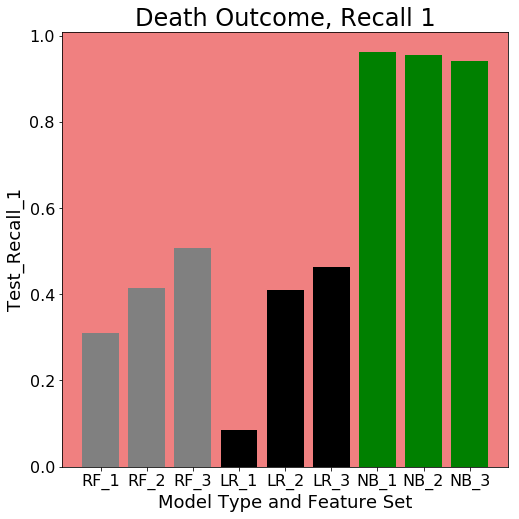

In [46]:
# Death, Test_Recall_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Death)'], 
                    df_1_2_RF['Model 1.2 (Death)'],
                    df_1_3_RF['Model 1.3 (Death)'],
                    df_1_1_LR['Model 1.1 (Death)'], 
                    df_1_2_LR['Model 1.2 (Death)'],
                    df_1_3_LR['Model 1.3 (Death)'],
                    df_1_1_NB['Model 1.1 (Death)'], 
                    df_1_2_NB['Model 1.2 (Death)'],
                    df_1_3_NB['Model 1.3 (Death)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Recall_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Recall_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('lightcoral')
plt.ylabel('Test_Recall_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Death Outcome, Recall 1', fontsize = 24)

plt.show()

   Test_Recall_1 names
0       0.096364  RF_1
1       0.034602  RF_2
2       0.107273  RF_3
3       0.020000  LR_1
4       0.024221  LR_2
5       0.049091  LR_3
6       0.916364  NB_1
7       0.903114  NB_2
8       0.783636  NB_3


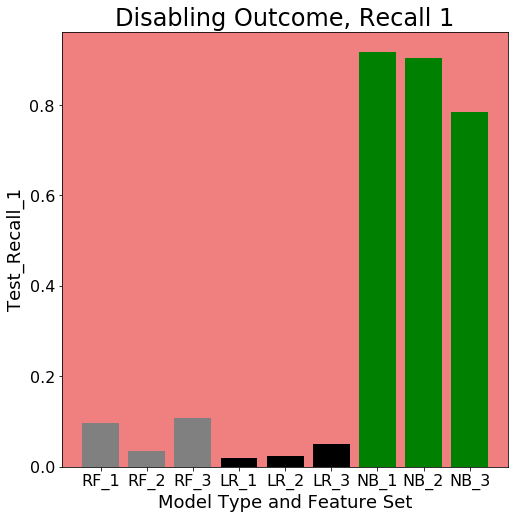

In [47]:
# Disabling, Test_Recall_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Disabling)'], 
                    df_1_2_RF['Model 1.2 (Disabling)'],
                    df_1_3_RF['Model 1.3 (Disabling)'],
                    df_1_1_LR['Model 1.1 (Disabling)'], 
                    df_1_2_LR['Model 1.2 (Disabling)'],
                    df_1_3_LR['Model 1.3 (Disabling)'],
                    df_1_1_NB['Model 1.1 (Disabling)'], 
                    df_1_2_NB['Model 1.2 (Disabling)'],
                    df_1_3_NB['Model 1.3 (Disabling)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Recall_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Recall_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('lightcoral')
plt.ylabel('Test_Recall_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Disabling Outcome, Recall 1', fontsize = 24)

plt.show()

   Test_Recall_1 names
0       0.458215  RF_1
1       0.452157  RF_2
2       0.486664  RF_3
3       0.309922  LR_1
4       0.408131  LR_2
5       0.431010  LR_3
6       0.561166  NB_1
7       0.701402  NB_2
8       0.687767  NB_3


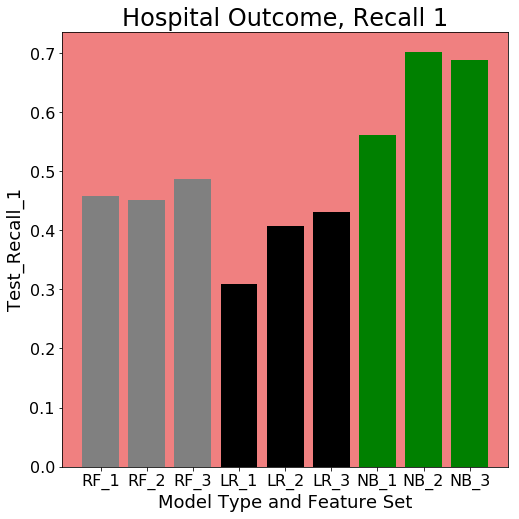

In [48]:
# Hospital, Test_Recall_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Hospital)'], 
                    df_1_2_RF['Model 1.2 (Hospital)'],
                    df_1_3_RF['Model 1.3 (Hospital)'],
                    df_1_1_LR['Model 1.1 (Hospital)'], 
                    df_1_2_LR['Model 1.2 (Hospital)'],
                    df_1_3_LR['Model 1.3 (Hospital)'],
                    df_1_1_NB['Model 1.1 (Hospital)'], 
                    df_1_2_NB['Model 1.2 (Hospital)'],
                    df_1_3_NB['Model 1.3 (Hospital)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Recall_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Recall_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('lightcoral')
plt.ylabel('Test_Recall_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Hospital Outcome, Recall 1', fontsize = 24)

plt.show()

   Test_Recall_1 names
0       0.109342  RF_1
1       0.042484  RF_2
2       0.109342  RF_3
3       0.035032  LR_1
4       0.052288  LR_2
5       0.066879  LR_3
6       0.956476  NB_1
7       0.929194  NB_2
8       0.888535  NB_3


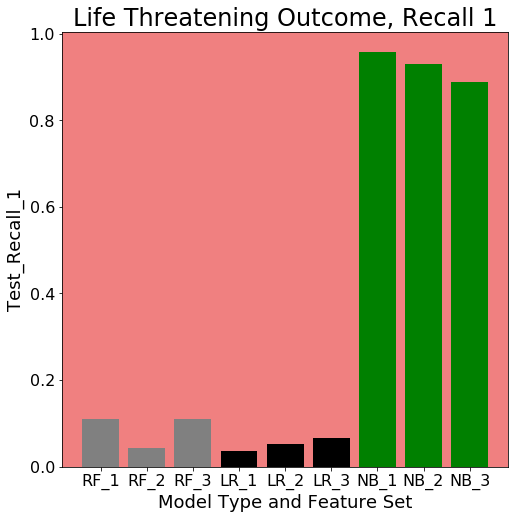

In [49]:
# Life Threatening, Test_Recall_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Life Threatening)'], 
                    df_1_2_RF['Model 1.2 (Life Threatening)'],
                    df_1_3_RF['Model 1.3 (Life Threatening)'],
                    df_1_1_LR['Model 1.1 (Life Threatening)'], 
                    df_1_2_LR['Model 1.2 (Life Threatening)'],
                    df_1_3_LR['Model 1.3 (Life Threatening)'],
                    df_1_1_NB['Model 1.1 (Life Threatening)'], 
                    df_1_2_NB['Model 1.2 (Life Threatening)'],
                    df_1_3_NB['Model 1.3 (Life Threatening)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Recall_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Recall_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('lightcoral')
plt.ylabel('Test_Recall_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Life Threatening Outcome, Recall 1', fontsize = 24)

plt.show()

In [16]:
# Test Precision for each model, each outcome

   Test_Precision_1 names
0          0.834327  RF_1
1          0.834994  RF_2
2          0.848485  RF_3
3          0.747529  LR_1
4          0.789769  LR_2
5          0.811569  LR_3
6          0.473504  NB_1
7          0.546577  NB_2
8          0.538919  NB_3


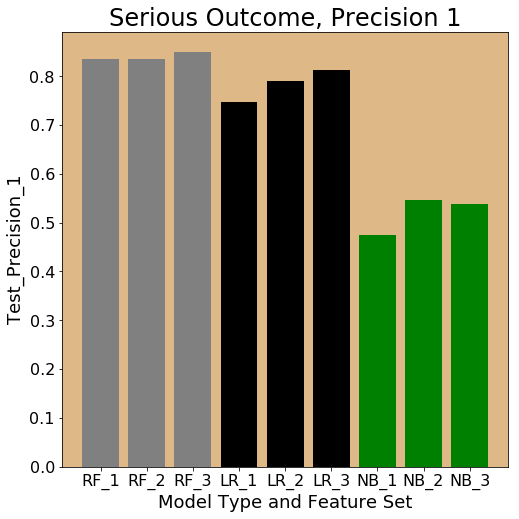

In [52]:
# Serious, Test_Precision_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Serious)'], 
                    df_1_2_RF['Model 1.2 (Serious)'],
                    df_1_3_RF['Model 1.3 (Serious)'],
                    df_1_1_LR['Model 1.1 (Serious)'], 
                    df_1_2_LR['Model 1.2 (Serious)'],
                    df_1_3_LR['Model 1.3 (Serious)'],
                    df_1_1_NB['Model 1.1 (Serious)'], 
                    df_1_2_NB['Model 1.2 (Serious)'],
                    df_1_3_NB['Model 1.3 (Serious)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Precision_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Precision_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('burlywood')

plt.ylabel('Test_Precision_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Serious Outcome, Precision 1', fontsize = 24)

plt.show()

   Test_Precision_1 names
0          0.804239  RF_1
1          0.884655  RF_2
2          0.840891  RF_3
3          0.441975  LR_1
4          0.787431  LR_2
5          0.805695  LR_3
6          0.094762  NB_1
7          0.102085  NB_2
8          0.101882  NB_3


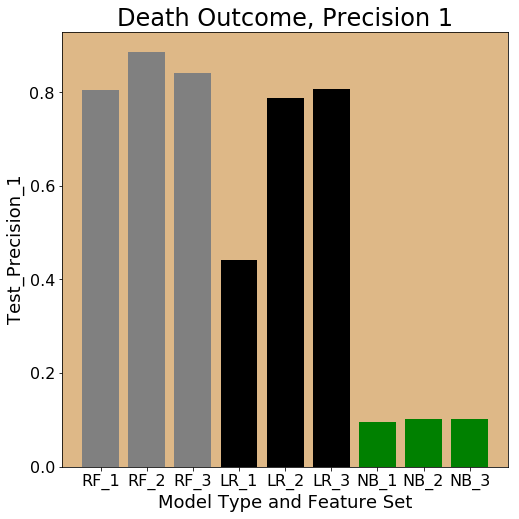

In [55]:
# Death, Test_Precision_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Death)'], 
                    df_1_2_RF['Model 1.2 (Death)'],
                    df_1_3_RF['Model 1.3 (Death)'],
                    df_1_1_LR['Model 1.1 (Death)'], 
                    df_1_2_LR['Model 1.2 (Death)'],
                    df_1_3_LR['Model 1.3 (Death)'],
                    df_1_1_NB['Model 1.1 (Death)'], 
                    df_1_2_NB['Model 1.2 (Death)'],
                    df_1_3_NB['Model 1.3 (Death)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Precision_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Precision_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('burlywood')
plt.ylabel('Test_Precision_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Death Outcome, Precision 1', fontsize = 24)

plt.show()

   Test_Precision_1 names
0          0.736111  RF_1
1          0.526316  RF_2
2          0.746835  RF_3
3          0.220000  LR_1
4          0.259259  LR_2
5          0.313953  LR_3
6          0.023534  NB_1
7          0.025170  NB_2
8          0.022795  NB_3


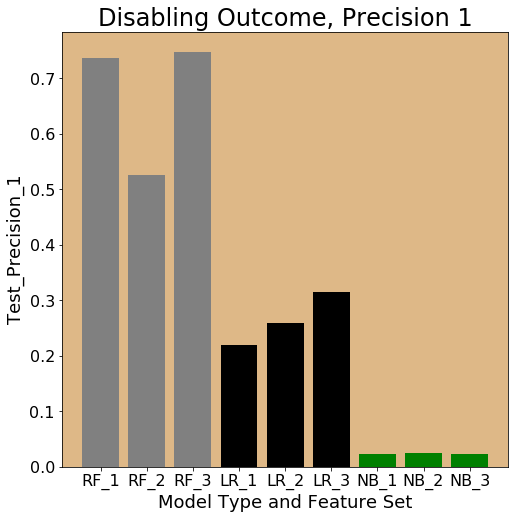

In [56]:
# Disabling, Test_Precision_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Disabling)'], 
                    df_1_2_RF['Model 1.2 (Disabling)'],
                    df_1_3_RF['Model 1.3 (Disabling)'],
                    df_1_1_LR['Model 1.1 (Disabling)'], 
                    df_1_2_LR['Model 1.2 (Disabling)'],
                    df_1_3_LR['Model 1.3 (Disabling)'],
                    df_1_1_NB['Model 1.1 (Disabling)'], 
                    df_1_2_NB['Model 1.2 (Disabling)'],
                    df_1_3_NB['Model 1.3 (Disabling)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Precision_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Precision_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('burlywood')
plt.ylabel('Test_Precision_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Disabling Outcome, Precision 1', fontsize = 24)

plt.show()

   Test_Precision_1 names
0          0.723267  RF_1
1          0.695522  RF_2
2          0.751510  RF_3
3          0.658730  LR_1
4          0.704135  LR_2
5          0.694357  LR_3
6          0.432684  NB_1
7          0.457609  NB_2
8          0.485503  NB_3


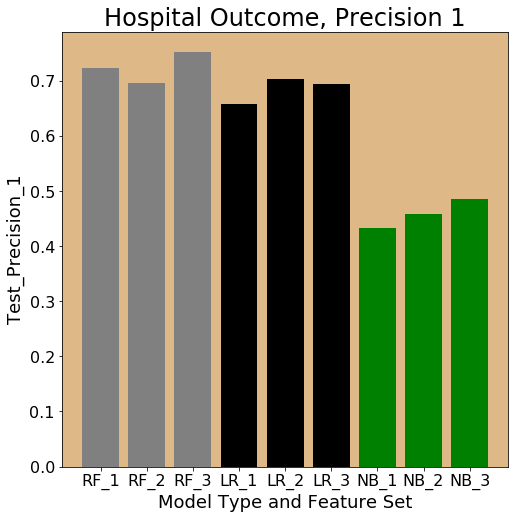

In [57]:
# Hospital, Test_Precision_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Hospital)'], 
                    df_1_2_RF['Model 1.2 (Hospital)'],
                    df_1_3_RF['Model 1.3 (Hospital)'],
                    df_1_1_LR['Model 1.1 (Hospital)'], 
                    df_1_2_LR['Model 1.2 (Hospital)'],
                    df_1_3_LR['Model 1.3 (Hospital)'],
                    df_1_1_NB['Model 1.1 (Hospital)'], 
                    df_1_2_NB['Model 1.2 (Hospital)'],
                    df_1_3_NB['Model 1.3 (Hospital)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Precision_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Precision_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('burlywood')
plt.ylabel('Test_Precision_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Hospital Outcome, Precision 1', fontsize = 24)

plt.show()

   Test_Precision_1 names
0          0.730496  RF_1
1          0.582090  RF_2
2          0.780303  RF_3
3          0.320388  LR_1
4          0.315789  LR_2
5          0.318182  LR_3
6          0.040899  NB_1
7          0.040658  NB_2
8          0.042354  NB_3


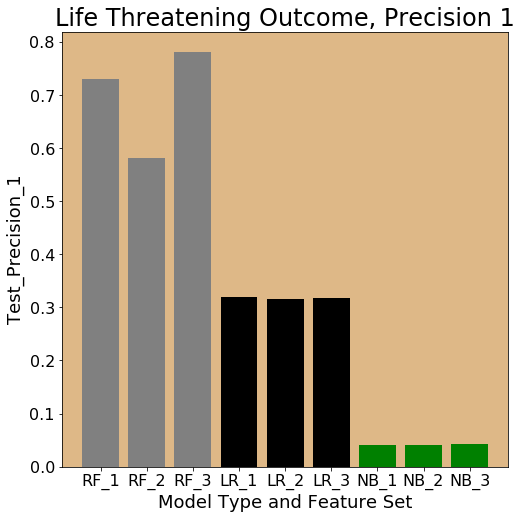

In [58]:
# Life Threatening, Test_Precision_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Life Threatening)'], 
                    df_1_2_RF['Model 1.2 (Life Threatening)'],
                    df_1_3_RF['Model 1.3 (Life Threatening)'],
                    df_1_1_LR['Model 1.1 (Life Threatening)'], 
                    df_1_2_LR['Model 1.2 (Life Threatening)'],
                    df_1_3_LR['Model 1.3 (Life Threatening)'],
                    df_1_1_NB['Model 1.1 (Life Threatening)'], 
                    df_1_2_NB['Model 1.2 (Life Threatening)'],
                    df_1_3_NB['Model 1.3 (Life Threatening)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Precision_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Precision_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('burlywood')
plt.ylabel('Test_Precision_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Life Threatening Outcome, Precision 1', fontsize = 24)

plt.show()

In [22]:
# Test F-Score for each model, each outcome

   Test_Fscore_1 names
0       0.806092  RF_1
1       0.815503  RF_2
2       0.835048  RF_3
3       0.758577  LR_1
4       0.815443  LR_2
5       0.834305  LR_3
6       0.634884  NB_1
7       0.696492  NB_2
8       0.692964  NB_3


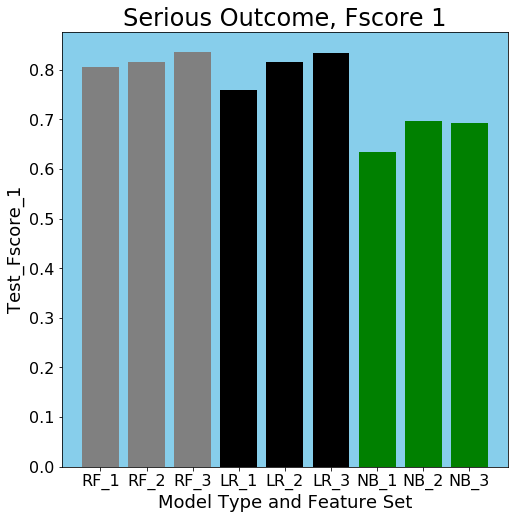

In [61]:
# Serious, Test_Fscore_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Serious)'], 
                    df_1_2_RF['Model 1.2 (Serious)'],
                    df_1_3_RF['Model 1.3 (Serious)'],
                    df_1_1_LR['Model 1.1 (Serious)'], 
                    df_1_2_LR['Model 1.2 (Serious)'],
                    df_1_3_LR['Model 1.3 (Serious)'],
                    df_1_1_NB['Model 1.1 (Serious)'], 
                    df_1_2_NB['Model 1.2 (Serious)'],
                    df_1_3_NB['Model 1.3 (Serious)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Fscore_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Fscore_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('skyblue')
plt.ylabel('Test_Fscore_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Serious Outcome, Fscore 1', fontsize = 24)

plt.show()

   Test_Fscore_1 names
0       0.447761  RF_1
1       0.564389  RF_2
2       0.633693  RF_3
3       0.144122  LR_1
4       0.540095  LR_2
5       0.587840  LR_3
6       0.172521  NB_1
7       0.184482  NB_2
8       0.183891  NB_3


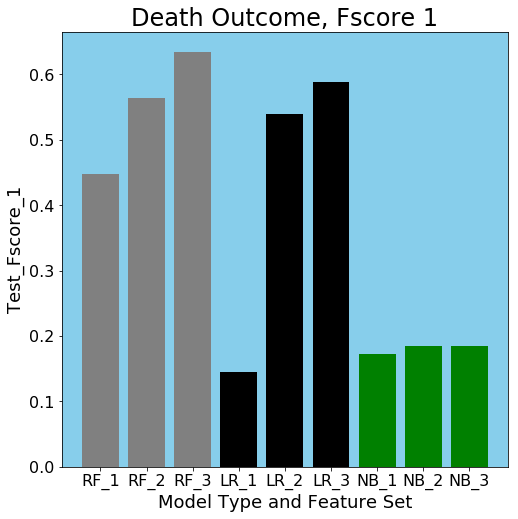

In [62]:
# Death, Test_Fscore_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Death)'], 
                    df_1_2_RF['Model 1.2 (Death)'],
                    df_1_3_RF['Model 1.3 (Death)'],
                    df_1_1_LR['Model 1.1 (Death)'], 
                    df_1_2_LR['Model 1.2 (Death)'],
                    df_1_3_LR['Model 1.3 (Death)'],
                    df_1_1_NB['Model 1.1 (Death)'], 
                    df_1_2_NB['Model 1.2 (Death)'],
                    df_1_3_NB['Model 1.3 (Death)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Fscore_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Fscore_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('skyblue')
plt.ylabel('Test_Fscore_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Death Outcome, Fscore 1', fontsize = 24)

plt.show()

   Test_Fscore_1 names
0       0.170418  RF_1
1       0.064935  RF_2
2       0.187599  RF_3
3       0.036667  LR_1
4       0.044304  LR_2
5       0.084906  LR_3
6       0.045889  NB_1
7       0.048975  NB_2
8       0.044301  NB_3


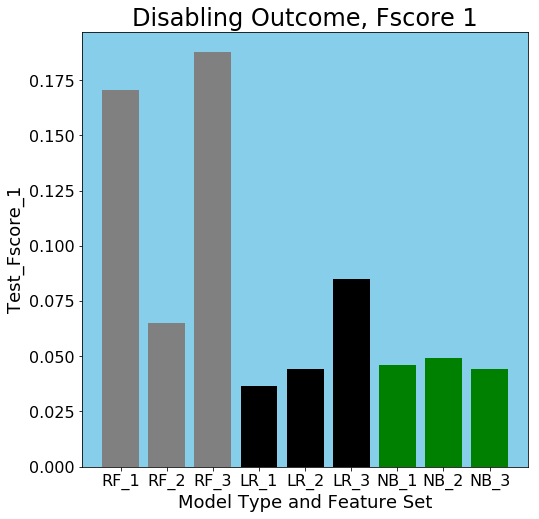

In [63]:
# Disabling, Test_Fscore_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Disabling)'], 
                    df_1_2_RF['Model 1.2 (Disabling)'],
                    df_1_3_RF['Model 1.3 (Disabling)'],
                    df_1_1_LR['Model 1.1 (Disabling)'], 
                    df_1_2_LR['Model 1.2 (Disabling)'],
                    df_1_3_LR['Model 1.3 (Disabling)'],
                    df_1_1_NB['Model 1.1 (Disabling)'], 
                    df_1_2_NB['Model 1.2 (Disabling)'],
                    df_1_3_NB['Model 1.3 (Disabling)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Fscore_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Fscore_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('skyblue')
plt.ylabel('Test_Fscore_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Disabling Outcome, Fscore 1', fontsize = 24)

plt.show()

   Test_Fscore_1 names
0       0.561010  RF_1
1       0.548037  RF_2
2       0.590762  RF_3
3       0.421524  LR_1
4       0.516745  LR_2
5       0.531871  LR_3
6       0.488621  NB_1
7       0.553866  NB_2
8       0.569200  NB_3


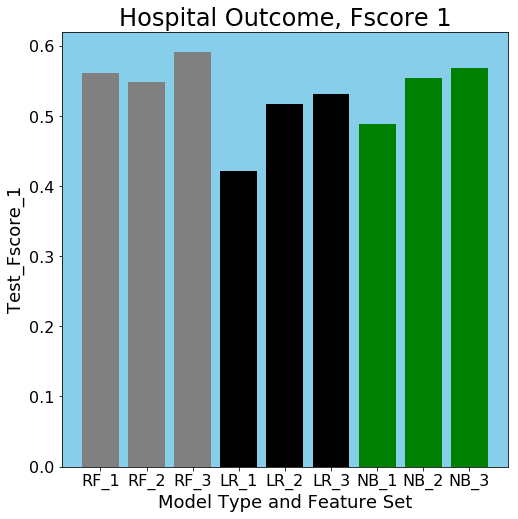

In [64]:
# Hospital, Test_Fscore_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Hospital)'], 
                    df_1_2_RF['Model 1.2 (Hospital)'],
                    df_1_3_RF['Model 1.3 (Hospital)'],
                    df_1_1_LR['Model 1.1 (Hospital)'], 
                    df_1_2_LR['Model 1.2 (Hospital)'],
                    df_1_3_LR['Model 1.3 (Hospital)'],
                    df_1_1_NB['Model 1.1 (Hospital)'], 
                    df_1_2_NB['Model 1.2 (Hospital)'],
                    df_1_3_NB['Model 1.3 (Hospital)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Fscore_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Fscore_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('skyblue')
plt.ylabel('Test_Fscore_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Hospital Outcome, Fscore 1', fontsize = 24)

plt.show()

   Test_Fscore_1 names
0       0.190212  RF_1
1       0.079188  RF_2
2       0.191806  RF_3
3       0.063158  LR_1
4       0.089720  LR_2
5       0.110526  LR_3
6       0.078443  NB_1
7       0.077907  NB_2
8       0.080854  NB_3


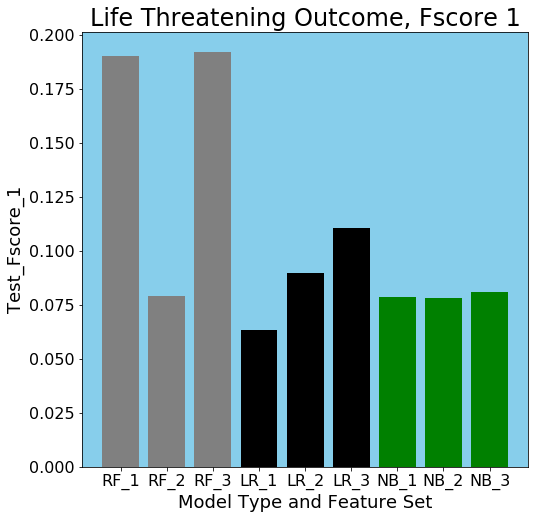

In [65]:
# Life Threatening, Test_Fscore_1
df_tmp = pd.concat([
                    df_1_1_RF['Model 1.1 (Life Threatening)'], 
                    df_1_2_RF['Model 1.2 (Life Threatening)'],
                    df_1_3_RF['Model 1.3 (Life Threatening)'],
                    df_1_1_LR['Model 1.1 (Life Threatening)'], 
                    df_1_2_LR['Model 1.2 (Life Threatening)'],
                    df_1_3_LR['Model 1.3 (Life Threatening)'],
                    df_1_1_NB['Model 1.1 (Life Threatening)'], 
                    df_1_2_NB['Model 1.2 (Life Threatening)'],
                    df_1_3_NB['Model 1.3 (Life Threatening)'],
                     ], 
                    axis = 1)
df_tmp = df_tmp.transpose()['Test_Fscore_1']
df_tmp = df_tmp.reset_index()
df_tmp = df_tmp.drop(['index'], axis = 1)
df_tmp['names'] = ['RF_1', 'RF_2', 'RF_3', 'LR_1', 'LR_2', 'LR_3', 'NB_1', 'NB_2', 'NB_3']
print(df_tmp)

fig, ax = plt.subplots(figsize = (8,8))
plt.bar(df_tmp['names'], 
        df_tmp['Test_Fscore_1'], 
        color = ['gray', 'gray', 'gray', 'black', 'black', 'black', 'green', 'green', 'green'])
ax.set_facecolor('skyblue')
plt.ylabel('Test_Fscore_1', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Model Type and Feature Set', fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Life Threatening Outcome, Fscore 1', fontsize = 24)

plt.show()